In [1]:
import QuantLib as ql
import math

In [2]:
day_count = ql.Actual365Fixed()
calendar = ql.UnitedStates()

calculation_date = ql.Date(6, 11, 2015)

spot = 659.37
ql.Settings.instance().evaluationDate = calculation_date

dividend_yield = ql.QuoteHandle(ql.SimpleQuote(0.0))
risk_free_rate = 0.01
dividend_rate = 0.0
flat_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, risk_free_rate, day_count))
dividend_ts = ql.YieldTermStructureHandle(ql.FlatForward(calculation_date, dividend_rate, day_count))

In [3]:
expiration_dates = [ql.Date(6, 12, 2015), ql.Date(6, 1, 2016), ql.Date(6, 2, 2016),
                    ql.Date(6, 3, 2016), ql.Date(6, 4, 2016), ql.Date(6, 5, 2016),
                    ql.Date(6, 6, 2016), ql.Date(6, 7, 2016), ql.Date(6, 8, 2016),
                    ql.Date(6, 9, 2016), ql.Date(6, 10, 2016), ql.Date(6, 11, 2016),
                    ql.Date(6, 12, 2016), ql.Date(6, 1, 2017), ql.Date(6, 2, 2017),
                    ql.Date(6, 3, 2017), ql.Date(6, 4, 2017), ql.Date(6, 5, 2017),
                    ql.Date(6, 6, 2017), ql.Date(6, 7, 2017), ql.Date(6, 8, 2017),
                    ql.Date(6, 9, 2017), ql.Date(6, 10, 2017), ql.Date(6, 11, 2017)]
strikes = [527.50, 560.46, 593.43, 626.40, 659.37, 692.34, 725.31, 758.28]
data = [[0.37819, 0.34177, 0.30394, 0.27832, 0.26453, 0.25916, 0.25941, 0.26127],
        [0.3445, 0.31769, 0.2933, 0.27614, 0.26575, 0.25729, 0.25228, 0.25202],
        [0.37419, 0.35372, 0.33729, 0.32492, 0.31601, 0.30883, 0.30036, 0.29568],
        [0.37498, 0.35847, 0.34475, 0.33399, 0.32715, 0.31943, 0.31098, 0.30506],
        [0.35941, 0.34516, 0.33296, 0.32275, 0.31867, 0.30969, 0.30239, 0.29631],
        [0.35521, 0.34242, 0.33154, 0.3219, 0.31948, 0.31096, 0.30424, 0.2984],
        [0.35442, 0.34267, 0.33288, 0.32374, 0.32245, 0.31474, 0.30838, 0.30283],
        [0.35384, 0.34286, 0.33386, 0.32507, 0.3246, 0.31745, 0.31135, 0.306],
        [0.35338, 0.343, 0.33464, 0.32614, 0.3263, 0.31961, 0.31371, 0.30852],
        [0.35301, 0.34312, 0.33526, 0.32698, 0.32766, 0.32132, 0.31588, 0.31052],
        [0.35272, 0.34322, 0.33574, 0.32765, 0.32873, 0.32267, 0.31705, 0.31209],
        [0.35246, 0.3433, 0.33617, 0.32822, 0.32965, 0.32383, 0.31831, 0.31344],
        [0.35226, 0.34336, 0.33651, 0.32869, 0.3304, 0.32477, 0.31934, 0.31453],
        [0.35207, 0.34342, 0.33681, 0.32911, 0.33106, 0.32561, 0.32025, 0.3155],
        [0.35171, 0.34327, 0.33679, 0.32931, 0.3319, 0.32665, 0.32139, 0.31675],
        [0.35128, 0.343, 0.33658, 0.32937, 0.33276, 0.32769, 0.32255, 0.31802],
        [0.35086, 0.34274, 0.33637, 0.32943, 0.3336, 0.32872, 0.32368, 0.31927],
        [0.35049, 0.34252, 0.33618, 0.32948, 0.33432, 0.32959, 0.32465, 0.32034],
        [0.35016, 0.34321, 0.33602, 0.32953, 0.33498, 0.3304, 0.32554, 0.32132],
        [0.34986, 0.34213, 0.33587, 0.32957, 0.33556, 0.3311, 0.32631, 0.32217],
        [0.34959, 0.34196, 0.33573, 0.32961, 0.3361, 0.33176, 0.32704, 0.32296],
        [0.34934, 0.34181, 0.33561, 0.32964, 0.33658, 0.33235, 0.32769, 0.32368],
        [0.34912, 0.34167, 0.3355, 0.32967, 0.33701, 0.33288, 0.32827, 0.32432],
        [0.34891, 0.34154, 0.33539, 0.3297, 0.33742, 0.33337, 0.32881, 0.32492]]

In [4]:
implied_vols = ql.Matrix(len(strikes), len(expiration_dates))
for i in range(implied_vols.rows()):
    for j in range(implied_vols.columns()):
        implied_vols[i][j] = data[j][i]

In [5]:
black_var_surface = ql.BlackVarianceSurface(calculation_date, calendar, expiration_dates, strikes, implied_vols, day_count)

In [6]:
strike = 600.0
expiry = 1.2
black_var_surface.blackVol(expiry, strike)

0.3352982638587421

In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

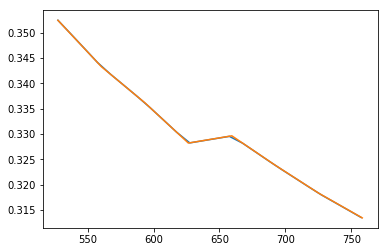

In [8]:
strikes_grid = np.arange(strikes[0], strikes[-1], 10)
expiry = 1.0
implied_vols = [black_var_surface.blackVol(expiry, s) for s in strikes_grid]
actual_data = data[11]
plt.plot(strikes_grid, implied_vols)
plt.plot(strikes, actual_data)

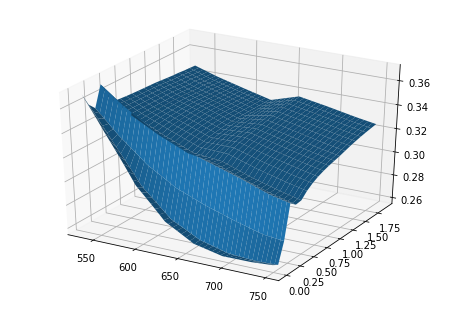

In [9]:
plot_years = np.arange(0, 2, 0.1)
plot_strikes = np.arange(535, 750, 1)
X, Y = np.meshgrid(plot_strikes, plot_years)
Z = np.array([black_var_surface.blackVol(float(y), float(x)) for xr, yr in zip(X, Y) for x, y in zip(xr, yr)]).reshape(len(X), len(X[0]))
fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
plt.show()

In [10]:
local_vol_surface = ql.LocalVolSurface(ql.BlackVolTermStructureHandle(black_var_surface), flat_ts, dividend_ts, spot)

In [11]:
plot_years = np.arange(0, 2, 0.1)
plot_strikes = np.arange(535, 750, 1)
X, Y = np.meshgrid(plot_strikes, plot_years)
Z = np.array([local_vol_surface.localVol(float(y), float(x)) for xr, yr in zip(X, Y) for x, y in zip(xr, yr)]).reshape(len(X), len(X[0]))
fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
plt.show()

In [12]:
black_var_surface.setInterpolation('bicubic')
local_vol_surface = ql.LocalVolSurface(ql.BlackVolTermStructureHandle(black_var_surface), flat_ts, dividend_ts, spot)
plot_years = np.arange(0, 2, 0.1)
plot_strikes = np.arange(535, 750, 1)
X, Y = np.meshgrid(plot_strikes, plot_years)
Z = np.array([local_vol_surface.localVol(float(y), float(x)) for xr, yr in zip(X, Y) for x, y in zip(xr, yr)]).reshape(len(X), len(X[0]))
fig = plt.figure()
from mpl_toolkits.mplot3d import Axes3D
ax = Axes3D(fig)
ax.plot_surface(X, Y, Z)
plt.show()

RuntimeError: negative local vol^2 at strike 657 and time 0.6; the black vol surface is not smooth enough

In [13]:
v0 = 0.01; kappa = 0.2; theta = 0.02; rho = -0.75; sigma = 0.5;
process = ql.HestonProcess(flat_ts, dividend_ts, ql.QuoteHandle(ql.SimpleQuote(spot)), v0, kappa, theta, sigma, rho)
model = ql.HestonModel(process)
engine = ql.AnalyticHestonEngine(model)

In [14]:
heston_helpers = []
black_var_surface.setInterpolation('bicubic')
one_year_idx = 11
date = expiration_dates[one_year_idx]
for j, s in enumerate(strikes):
    t = (date - calculation_date)
    p = ql.Period(t, ql.Days)
    sigma = data[one_year_idx][j]
    helper = ql.HestonModelHelper(p, calendar, spot, s, ql.QuoteHandle(ql.SimpleQuote(sigma)), flat_ts, dividend_ts)
    helper.setPricingEngine(engine)
    heston_helpers.append(helper)


In [17]:
lm = ql.LevenbergMarquardt(1e-8, 1e-8, 1e-8)
model.calibrate(heston_helpers, lm, ql.EndCriteria(500, 50, 1.0e-8, 1.0e-8, 1.0e-8))
theta, kappa, sigma, rho, v0 = model.params()

In [18]:
print("theta = %f, kappa = %f, sigma = %f, rho = %f, v0 = %f" % (theta, kappa, sigma, rho, v0))

theta = 0.132145, kappa = 10.971256, sigma = 4.014453, rho = -0.351557, v0 = 0.068514


In [19]:
avg = 0.0

summary = []
for i, opt in enumerate(heston_helpers):
    err = (opt.modelValue()/opt.marketValue() - 1.0)
    summary.append((strikes[i], opt.marketValue(), opt.modelValue(), 100.0*(opt.modelValue()/opt.marketValue() - 1.0)))
    avg += abs(err)
avg = avg*100.0/len(heston_helpers)

In [20]:
import pandas as pd

print("Average Abs Error (%%): %5.3f" % (avg))

pd.DataFrame(summary, columns=['Strikes', 'Market value', 'Model value', 'Relative error (%)'], index=['']*len(summary))

Average Abs Error (%): 0.633


,Strikes,Market value,Model value,Relative error (%)
,527.50,44.678931,44.465566,-0.477552
,560.46,55.052769,55.232883,0.327167
,593.43,67.371524,67.665919,0.436973
,626.40,80.934108,81.828301,1.104841
,659.37,98.889639,97.751711,-1.150705
,692.34,93.297706,92.551980,-0.799297
,725.31,79.649513,79.448640,-0.252195
,758.28,67.621458,67.972307,0.518843
